In [69]:
#Import all packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import chi2_contingency

In [70]:
#Load my data set into pandas
df = pd.read_csv('medical_clean.csv')

In [71]:
#Create a second one with only the two columns to look at the descriptions
df2 = df[['ReAdmis', 'Complication_risk']]
df2.describe()

,ReAdmis,Complication_risk
count,10000,10000
unique,2,3
top,No,Medium
freq,6331,4517


In [72]:
#Create a contingency table for the ReAdmis and Complication_risk variables
contingency = pd.crosstab(df['ReAdmis'], df['Complication_risk'])
contingency

Complication_risk,High,Low,Medium
ReAdmis,,,
No,2135,1343,2853
Yes,1223,782,1664


In [73]:
#Second contingency table to see the percentages of each value compared to the total
contingency_pct = pd.crosstab(df['ReAdmis'], df['Complication_risk'], normalize = 'index')
contingency_pct

Complication_risk,High,Low,Medium
ReAdmis,,,
No,0.337230,0.212131,0.45064
Yes,0.333333,0.213137,0.45353


In [74]:
#Run Chi-Square test for the p-value then test it against the alpha value of 0.05
c, p, dof, expected = chi2_contingency(contingency)

alpha = 0.05
print("p-value is: " + str(p))
if p <= alpha:
    print('Dependent: Reject H0.')
else:
    print('Independent: H0 holds true.')

p-value is: 0.923567890607327
Independent: H0 holds true.


In [75]:
#Rename the 'item' columns I'm using for better visualization
df.rename(columns = {'Item1': 'Timely_Admission',
                     'Item2': 'Timely_Treatment',
                     'Item6': 'Hours_of_Treatment',
                     'Item8': 'Evidence_of_Listening'},
          inplace = True)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'TotalCharge'}>],
       [<AxesSubplot:title={'center':'Timely_Admission'}>,
        <AxesSubplot:title={'center':'Timely_Treatment'}>]], dtype=object)

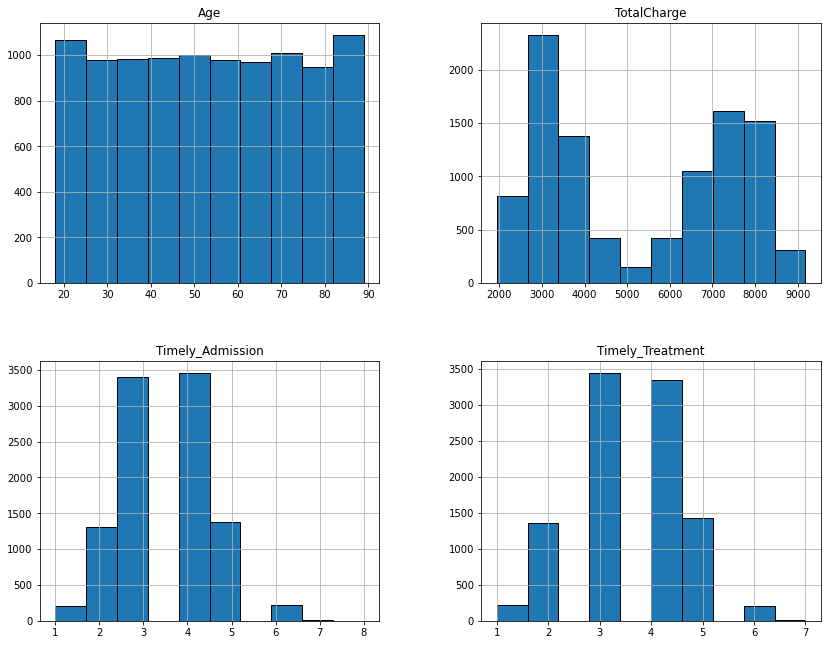

In [76]:
#Create histograms for the continuous and categorical variables
df[['Age', 'TotalCharge', 'Timely_Admission', 'Timely_Treatment']].hist(ec = "black", figsize = (14, 11))
#plt.savefig('Univariate Histogram.jpg')

<AxesSubplot:xlabel='Age'>

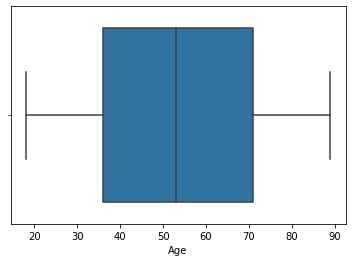

In [77]:
#Create boxplots for the continuous and categorical variables [2]
sns.boxplot(x = df['Age'])
#plt.savefig('Age Boxplot.jpg')

<AxesSubplot:xlabel='TotalCharge'>

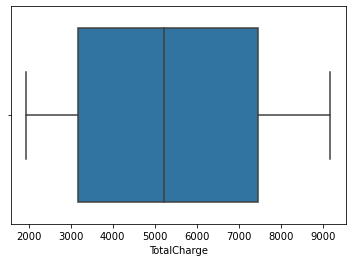

In [78]:
sns.boxplot(x = df['TotalCharge'])
#plt.savefig('Charges Boxplot.jpg')

<AxesSubplot:xlabel='Timely_Admission'>

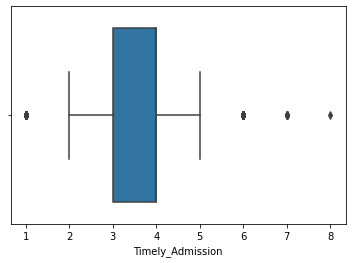

In [79]:
sns.boxplot(x = df['Timely_Admission'])
#plt.savefig('Admission Boxplot.jpg')

<AxesSubplot:xlabel='Timely_Treatment'>

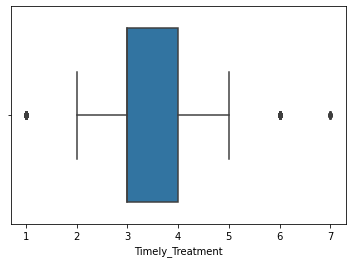

In [80]:
sns.boxplot(x = df['Timely_Treatment'])
#plt.savefig('Treatment Boxplot.jpg')

<AxesSubplot:xlabel='Age', ylabel='TotalCharge'>

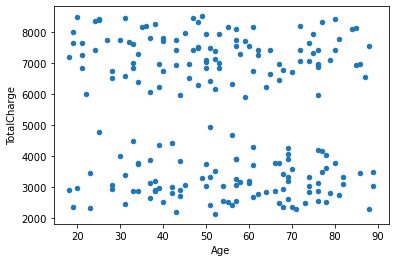

In [81]:
#Create a scatter plot for the continuous variables [1]
df[df['Age'] < 100].sample(200).plot.scatter(x = 'Age', y = 'TotalCharge')
#plt.savefig('Continuous Scatter.jpg')

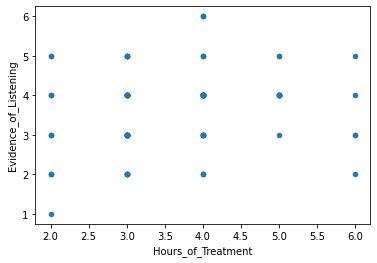

In [82]:
#Create a scatter plot for the categorical variables
df[df['Hours_of_Treatment'] < 10].sample(100).plot.scatter(x = 'Hours_of_Treatment', y = 'Evidence_of_Listening')
plt.savefig('Categorical Scatter.jpg')